In [8]:
import sys
sys.path.append("/Users/shamanthk/Documents/iomics/dowhy-preeclampsia")

In [9]:
import numpy as np
import pandas as pd
from EstimateEffect import *

In [10]:
df = pd.read_csv('../data/betas.csv', index_col=0)
df.index = df.index.str.replace(r'::.*', '', regex=True)
df.columns = df.columns.str.replace(r'::.*', '', regex=True)

df = df.transpose()
df.head()

,A1BG,A2BP1,A2ML1,A4GALT,A4GNT,AADAT,AAK1,AANAT,AARS,AASDH,...,ZSCAN16,ZSCAN18,ZSCAN2,ZSCAN22,ZUFSP,ZW10,ZWINT,ZYX,ZZEF1,ZZZ3
GSM788417,0.348367,0.319899,0.768433,0.081964,0.685641,0.060380,0.030600,0.628545,0.034695,0.038169,...,0.155679,0.065414,0.059830,0.019980,0.035917,0.080395,0.079731,0.084788,0.154323,0.054018
GSM788419,0.364492,0.310907,0.764368,0.070794,0.692982,0.049903,0.030167,0.623489,0.039860,0.035158,...,0.119980,0.059075,0.058748,0.017119,0.034855,0.067926,0.066641,0.068883,0.139299,0.043898
GSM788420,0.349403,0.305689,0.771950,0.070062,0.694961,0.054181,0.029743,0.626342,0.036626,0.039165,...,0.124261,0.061837,0.057167,0.018410,0.037608,0.076475,0.077044,0.077043,0.143271,0.048421
GSM788421,0.371034,0.303553,0.779977,0.063303,0.698230,0.048508,0.025756,0.628486,0.035684,0.034624,...,0.129721,0.056181,0.052445,0.015951,0.035129,0.068537,0.069168,0.068694,0.127377,0.045447
GSM788414,0.374402,0.284613,0.786321,0.059106,0.697250,0.046840,0.029264,0.632338,0.033920,0.035989,...,0.121801,0.054721,0.050782,0.016837,0.036205,0.062236,0.062481,0.063668,0.121910,0.041457


In [11]:
df.drop(columns=df.columns[:9632], inplace=True)
df.head()

,ZZEF1,ZZZ3
GSM788417,0.154323,0.054018
GSM788419,0.139299,0.043898
GSM788420,0.143271,0.048421
GSM788421,0.127377,0.045447
GSM788414,0.121910,0.041457


In [12]:
df.shape

In [13]:
EstimationModel = EstimateEffect(df)

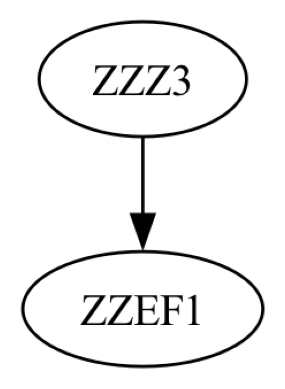

In [15]:
causal_graph = EstimationModel.find_causal_graph(algo='pc')

disp_graph_nx(causal_graph)